<a href="https://colab.research.google.com/github/pp2098/Heart-Disease-prediction/blob/main/P3_Ml_Heart_diseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("Heart_Disease_Prediction.csv")


In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df['Heart Disease']=df['Heart Disease'].apply(lambda x:1 if x=="Presence" else 0)
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

In [ ]:
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

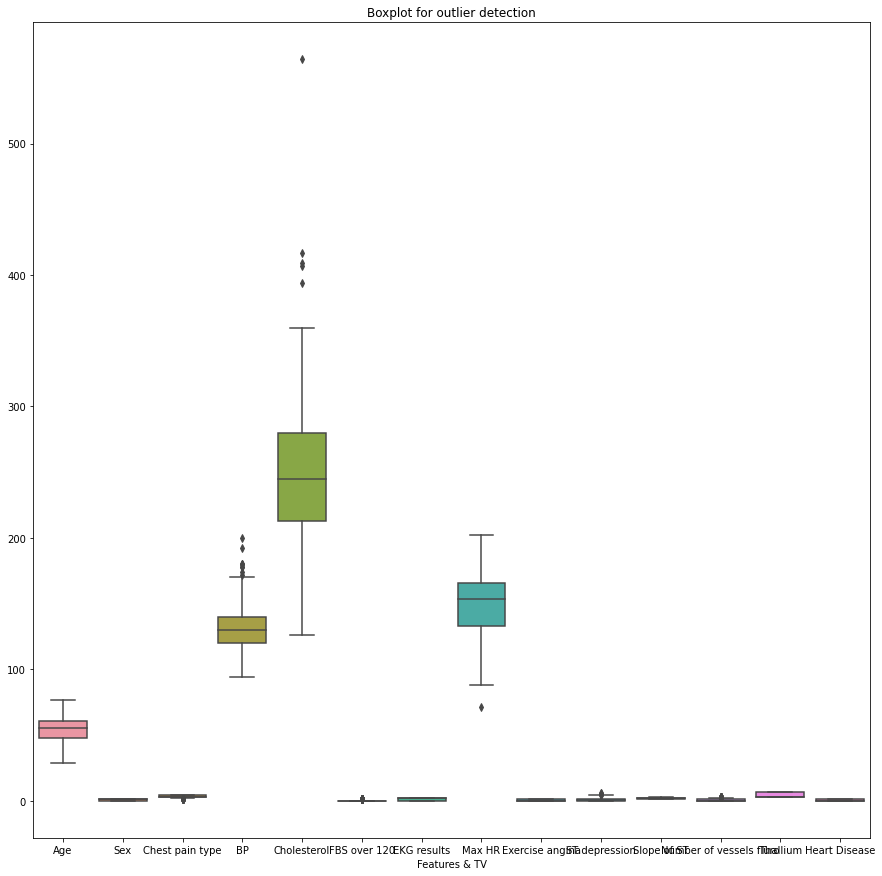

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df)
plt.title("Boxplot for outlier detection")
plt.xlabel("Features & TV")
plt.show()


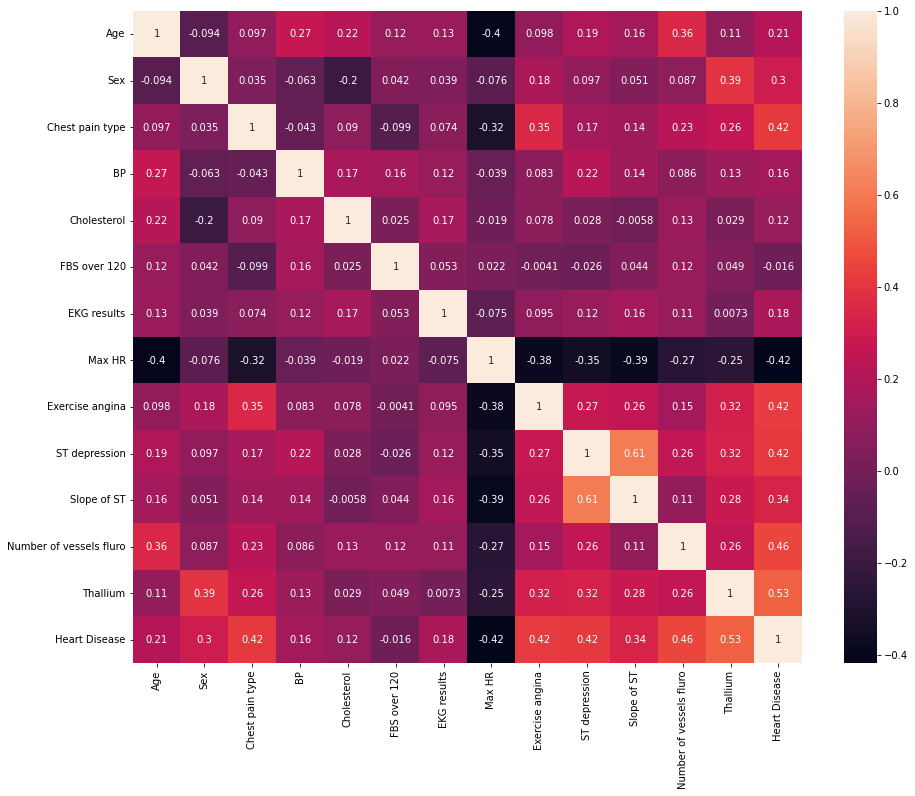

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()['Heart Disease'].sort_values()

Max HR                    -0.418514
FBS over 120              -0.016319
Cholesterol                0.118021
BP                         0.155383
EKG results                0.182091
Age                        0.212322
Sex                        0.297721
Slope of ST                0.337616
Chest pain type            0.417436
ST depression              0.417967
Exercise angina            0.419303
Number of vessels fluro    0.455336
Thallium                   0.525020
Heart Disease              1.000000
Name: Heart Disease, dtype: float64

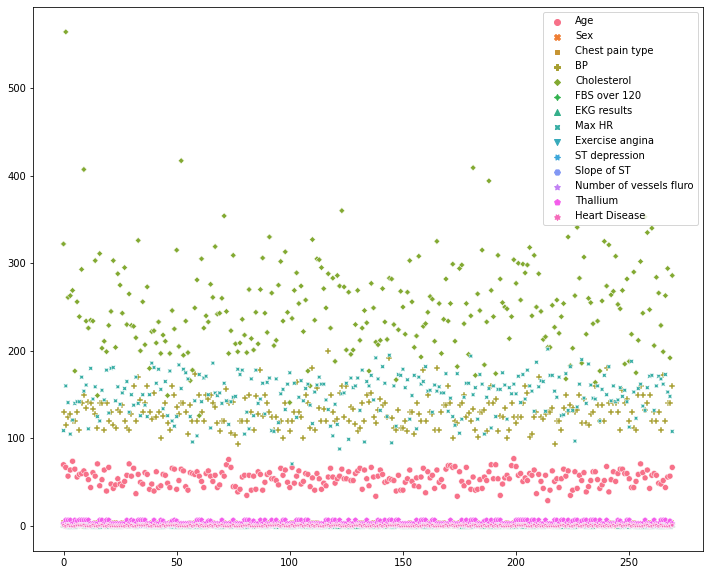

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


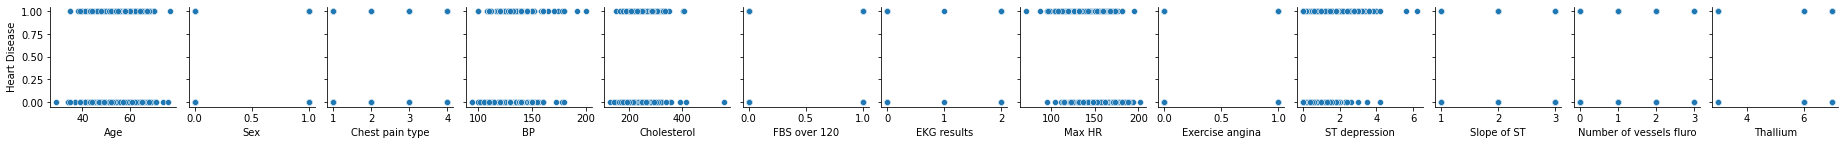

In [ ]:
sns.pairplot(df,x_vars=df.drop(('Heart Disease'),axis=1),y_vars='Heart Disease',kind='scatter',height=3,size=2)

In [ ]:
X=df.drop(('Heart Disease'),axis=1)
Y=df['Heart Disease']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=52)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("Y_train shape",Y_train.shape)
print("Y_test shape",Y_test.shape)

X_train shape (202, 13)
X_test shape (68, 13)
Y_train shape (202,)
Y_test shape (68,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lg=LogisticRegression(random_state=10)
lg.fit(X_train,Y_train)
lg_pred=lg.predict(X_test)
lg_pred_prob=lg.predict_proba(X_test)[::,1]
print("Accuracy score for Logistic Regression model is: ",metrics.accuracy_score(Y_test,lg_pred))

Accuracy score for Logistic Regression model is:  0.8382352941176471


Confusion Matrix for Logistic Regression model
[[32  6]
 [ 5 25]]


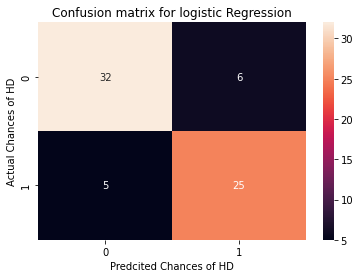

In [ ]:
conf_lg=metrics.confusion_matrix(Y_test,lg_pred)
print("Confusion Matrix for Logistic Regression model")
print(conf_lg)
sns.heatmap(conf_lg,annot=True)
plt.title("Confusion matrix for logistic Regression")
plt.xlabel("Predcited Chances of HD")
plt.ylabel("Actual Chances of HD")
plt.show()
#TN=36,TP=29,FN=10,FP=6

In [ ]:
print("Classification report for logistic regression model")
print(metrics.classification_report(Y_test,lg_pred))

Classification report for logistic regression model
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.81      0.83      0.82        30

    accuracy                           0.84        68
   macro avg       0.84      0.84      0.84        68
weighted avg       0.84      0.84      0.84        68



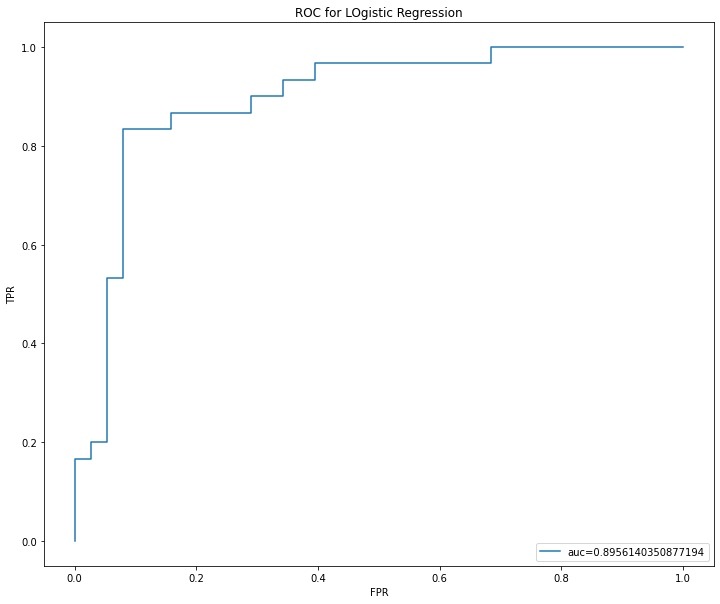

In [ ]:
fpr,tpr,threshold=metrics.roc_curve(Y_test,lg_pred_prob)
auc=metrics.roc_auc_score(Y_test,lg_pred_prob)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC for LOgistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


In [ ]:
print("AUC score")
print(metrics.roc_auc_score(Y_test,lg_pred_prob))
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,X_train,Y_train,cv=10)
print("Cross Val Score for LOgistic regression: ",score.mean())

AUC score
0.8956140350877194
Cross Val Score for LOgistic regression:  0.8421428571428571


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
knn_pred_prob=knn.predict_proba(X_test)[::,1]
print("Accuracy score for KNN Model: ",metrics.accuracy_score(Y_test,knn_pred))

Accuracy score for KNN Model:  0.8235294117647058


Confusion Matrix for KNN model
[[33  5]
 [ 7 23]]


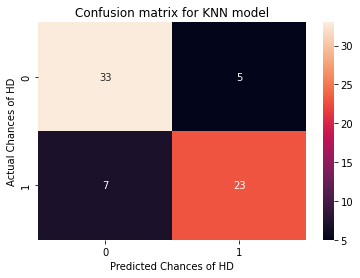

In [ ]:
conf_knn=metrics.confusion_matrix(Y_test,knn_pred)
print("Confusion Matrix for KNN model")
print(conf_knn)
sns.heatmap(conf_knn,annot=True)
plt.title("Confusion matrix for KNN model")
plt.xlabel("Predicted Chances of HD")
plt.ylabel("Actual Chances of HD")
plt.show()

In [ ]:
print("Classification report for kNN model")
print(metrics.classification_report(Y_test,knn_pred))

Classification report for kNN model
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        38
           1       0.82      0.77      0.79        30

    accuracy                           0.82        68
   macro avg       0.82      0.82      0.82        68
weighted avg       0.82      0.82      0.82        68



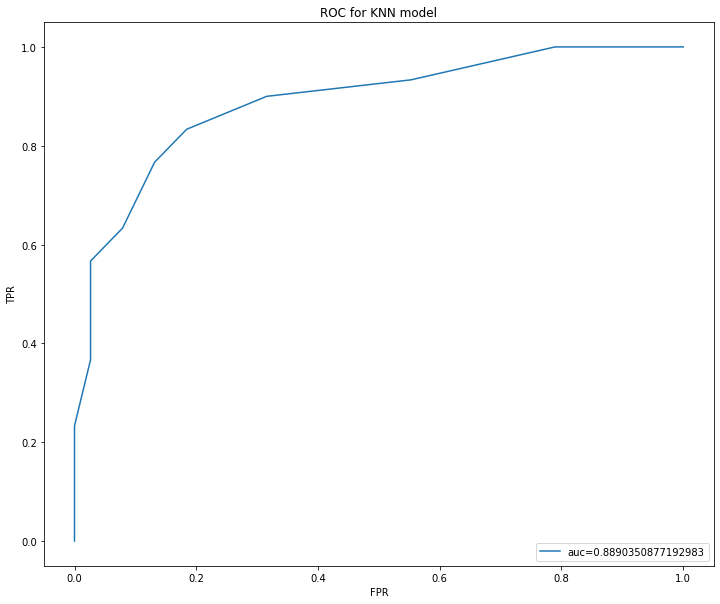

In [ ]:
fpr,tpr,threshold=metrics.roc_curve(Y_test,knn_pred_prob)
auc=metrics.roc_auc_score(Y_test,knn_pred_prob)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC for KNN model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
print("AUC for KNN model: ",metrics.roc_auc_score(Y_test,knn_pred_prob))
print("Cross Val Score for KNN Model: ",cross_val_score(knn,X_train,Y_train,cv=10).mean())

AUC for KNN model:  0.8890350877192983
Cross Val Score for KNN Model:  0.866904761904762


In [ ]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='rbf',gamma=0.1,random_state=101)
svc.fit(X_train,Y_train)
svc_pred=svc.predict(X_test)
print("Accuracy score for SVC model: ",metrics.accuracy_score(Y_test,svc_pred))

Accuracy score for SVC model:  0.8088235294117647


Confusion Matrix for SVC Model
[[31  7]
 [ 6 24]]


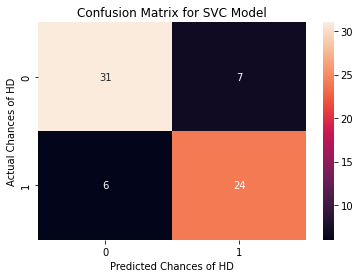

In [ ]:
conf_svc=metrics.confusion_matrix(Y_test,svc_pred)
print("Confusion Matrix for SVC Model")
print(conf_svc)
sns.heatmap(conf_svc,annot=True)
plt.title("Confusion Matrix for SVC Model")
plt.xlabel("Predicted Chances of HD")
plt.ylabel("Actual Chances of HD")
plt.show()

In [ ]:
print("Classification report for SVC model")
print(metrics.classification_report(Y_test,svc_pred))

Classification report for SVC model
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        38
           1       0.77      0.80      0.79        30

    accuracy                           0.81        68
   macro avg       0.81      0.81      0.81        68
weighted avg       0.81      0.81      0.81        68



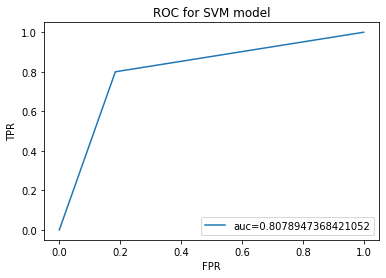

In [ ]:
fpr,tpr,threshold=metrics.roc_curve(Y_test,svc_pred)
auc=metrics.roc_auc_score(Y_test,svc_pred)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC for SVM model")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
print("AUC Score for SVC Model: ",metrics.roc_auc_score(Y_test,svc_pred))
print("Cross Val Score for SVC model: ",cross_val_score(svc,X_train,Y_train,cv=10).mean())

AUC Score for SVC Model:  0.8078947368421052
Cross Val Score for SVC model:  0.8171428571428571


In [ ]:
df1=pd.DataFrame({"Model Names":['Logistic Regression','KNN','SVM'],
                  "Accuracy":[84,82,81],
                  "Cross_Val_score":[84,87,82]
                  }
                 )
df1

,Model Names,Accuracy,Cross_Val_score
0,Logistic Regression,84,84
1,KNN,82,87
2,SVM,81,82


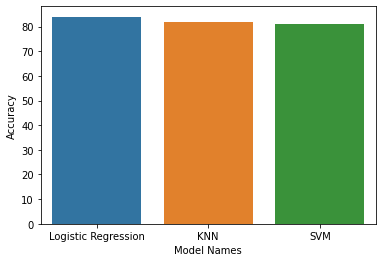

In [ ]:
sns.barplot(data=df1,x='Model Names',y='Accuracy')

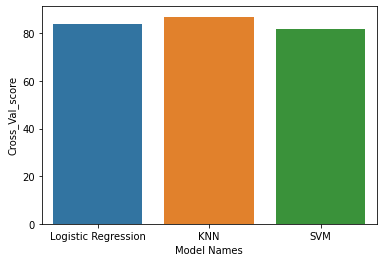

In [ ]:
sns.barplot(data=df1,x='Model Names',y='Cross_Val_score')

In [ ]:
Conclusion:Logistic Regression is the best model in terms of accuracy and cross val score and it is best fir model among all